In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data= pd.read_csv("G:/Project/Project dataset 2022 (1) .csv",encoding='latin1')

## Exploratory data Analysis

In [3]:
data.head()

,Index,User.ID,Song Tital,Singer,Movie/Album,Year,Music Director,Language,Rating,duration_ms
0,4993,643,Oh Mumbai,"K. J. Yesudas, Hariharan",Millenium Stars,2012,Various Artists,Hindi,3,140693
1,10448,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...",L.O.C. Kargil,2003,"Anu Malik, Javed Akhtar",Hindi,2,211493
2,10449,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra",Kabhi Na Kabhi Original Motion Picture Soundtr...,1998,A.R. Rahman,Hindi,4,57493
3,7247,1105,College Style,"KK, Hariharan",Prema Desam,1996,A.R. Rahman,Hindi,3,202235
4,3257,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan",Khamoshi- The Musical,1996,Various Artists,Hindi,NAN,502067


In [4]:
#checking shape of data
#calculating dimensions
rows, columns = data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  15811 Columns = 10


In [5]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15811 entries, 0 to 15810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           15811 non-null  int64 
 1   User.ID         15811 non-null  int64 
 2   Song Tital      15806 non-null  object
 3   Singer          15810 non-null  object
 4   Movie/Album     15804 non-null  object
 5   Year            15811 non-null  int64 
 6   Music Director  15757 non-null  object
 7   Language        15704 non-null  object
 8   Rating          15811 non-null  object
 9   duration_ms     15811 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.2+ MB


In [6]:
data.dtypes

Index              int64
User.ID            int64
Song Tital        object
Singer            object
Movie/Album       object
Year               int64
Music Director    object
Language          object
Rating            object
duration_ms        int64
dtype: object

In [7]:
data['Rating']=pd.to_numeric(data['Rating'],errors='coerce')

In [8]:
data.dtypes

Index               int64
User.ID             int64
Song Tital         object
Singer             object
Movie/Album        object
Year                int64
Music Director     object
Language           object
Rating            float64
duration_ms         int64
dtype: object

# Drop column 

In [9]:
data=data.drop('Index',axis=1)

## Checking For Duplicate Values

In [10]:
data[data.duplicated()].shape

(0, 9)

## Rename the column

In [11]:
#rename the column
data=data.rename({'User.ID' : 'userid', 'Movie/Album' : 'moviealbum', 'duration_ms' : 'durationms','Song Tital':'Song_title','Music Director':'Music_Director'}, axis=1)

# Visualization

<AxesSubplot:>

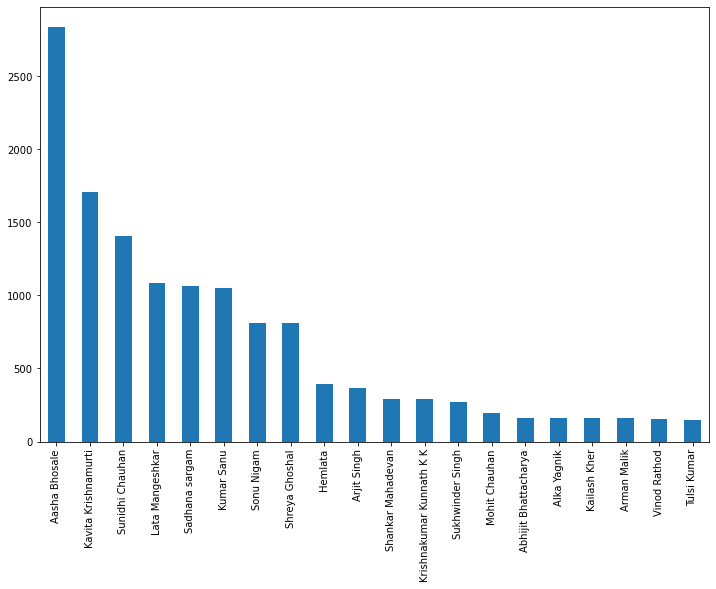

In [12]:
#fig=plt.figure(figsize=(20,8))
top=data['Singer'].value_counts()[:20]
top.plot(kind='bar',figsize=(12,8))

<AxesSubplot:>

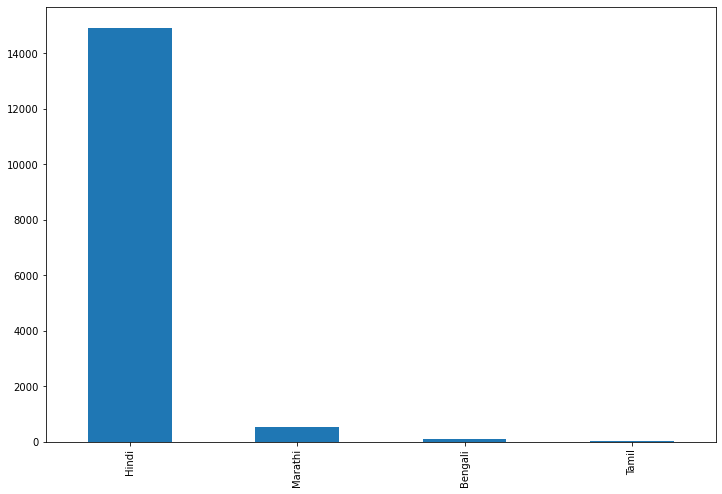

In [13]:
fig=plt.figure(figsize=(12,8))
data['Language'].value_counts()[:4].plot.bar()

<AxesSubplot:>

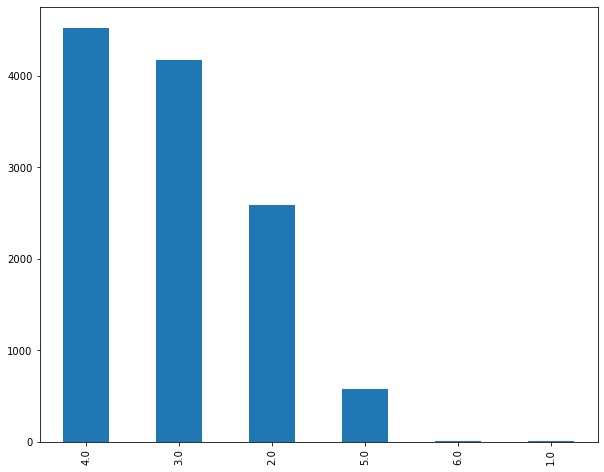

In [14]:
fig=plt.figure(figsize=(10,8))
data['Rating'].value_counts().plot.bar()

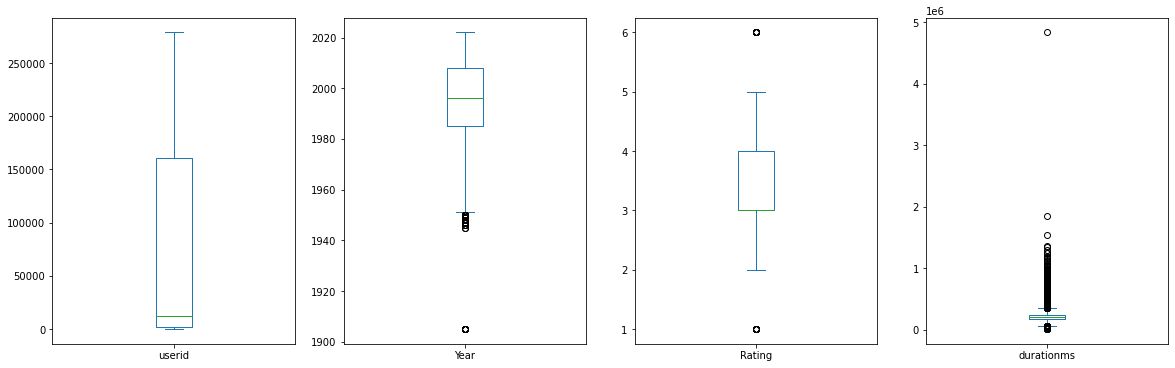

In [15]:
data.plot(kind='box', subplots= True, figsize=(20,6))
plt.show()

<AxesSubplot:>

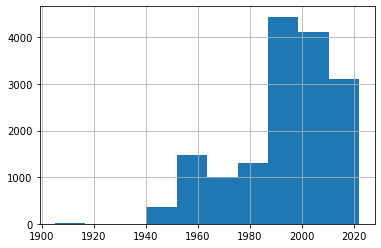

In [16]:
# histogram 
data['Year'].hist()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='decade', ylabel='count'>

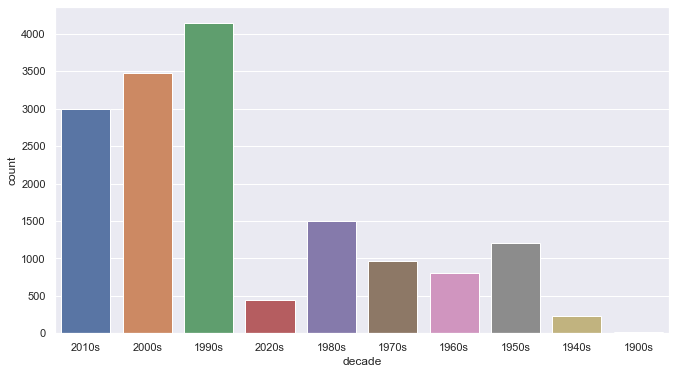

In [17]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['Year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [18]:
#checking description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userid,15811.0,71233.825375,102886.272681,8.0,2111.0,12117.0,161041.0,278846.0
Year,15811.0,1993.846816,19.042080,1905.0,1985.0,1996.0,2008.0,2022.0
Rating,11892.0,3.261689,0.857603,1.0,3.0,3.0,4.0,6.0
durationms,15811.0,213117.223768,106773.611571,9870.0,167680.0,202031.0,238239.0,4830606.0


## Missing Values and Imputation

In [19]:
#check null values: 
data.isnull().sum()

userid               0
Song_title           5
Singer               1
moviealbum           7
Year                 0
Music_Director      54
Language           107
Rating            3919
durationms           0
decade               0
dtype: int64

<AxesSubplot:>

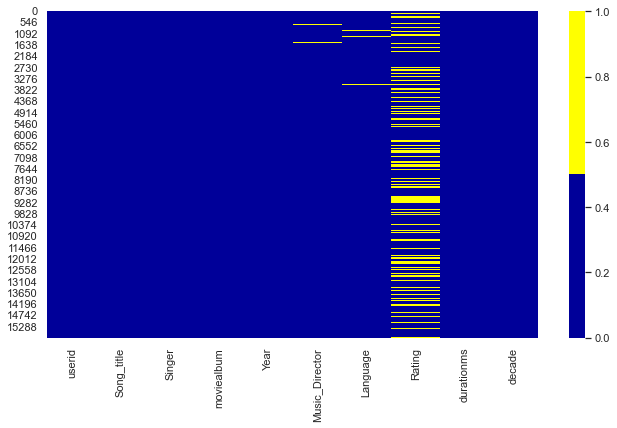

In [20]:
cols = data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [21]:
data['Rating']=data['Rating'].fillna(data['Rating'].median())

In [22]:
data

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan",Millenium Stars,2012,Various Artists,Hindi,3.0,140693,2010s
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...",L.O.C. Kargil,2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra",Kabhi Na Kabhi Original Motion Picture Soundtr...,1998,A.R. Rahman,Hindi,4.0,57493,1990s
3,1105,College Style,"KK, Hariharan",Prema Desam,1996,A.R. Rahman,Hindi,3.0,202235,1990s
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan",Khamoshi- The Musical,1996,Various Artists,Hindi,3.0,502067,1990s
...,...,...,...,...,...,...,...,...,...,...
15806,242,Tuch Sukhakarta,Prahlad Shinde,Aavad Bhajanachi,1905,Various Artists,Marathi,3.0,199272,1900s
15807,1050,Ishkkachi Nauka,"Shubhangi Kedar, Keval Walanj",Ishkkachi Nauka,1905,"Shubhangi Kedar, Keval Walanj",Marathi,2.0,277413,1900s
15808,651,O Raaje,Sukhwinder Singh,Mee Shivajiraje Bhosale Boltoy Original Motion...,1905,Ajit - Sameer - Atul,Marathi,3.0,161571,1900s
15809,643,Pahile Nabi Tula,Suresh Wadkar,Marathi Film & Modern Songs,1905,Anil Arun,Marathi,3.0,138760,1900s


In [23]:
data['Language']=data['Language'].fillna('Hindi')

In [24]:
data.isnull().sum()

userid             0
Song_title         5
Singer             1
moviealbum         7
Year               0
Music_Director    54
Language           0
Rating             0
durationms         0
decade             0
dtype: int64

In [25]:
data=data.dropna()

In [26]:
data

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan",Millenium Stars,2012,Various Artists,Hindi,3.0,140693,2010s
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...",L.O.C. Kargil,2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra",Kabhi Na Kabhi Original Motion Picture Soundtr...,1998,A.R. Rahman,Hindi,4.0,57493,1990s
3,1105,College Style,"KK, Hariharan",Prema Desam,1996,A.R. Rahman,Hindi,3.0,202235,1990s
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan",Khamoshi- The Musical,1996,Various Artists,Hindi,3.0,502067,1990s
...,...,...,...,...,...,...,...,...,...,...
15806,242,Tuch Sukhakarta,Prahlad Shinde,Aavad Bhajanachi,1905,Various Artists,Marathi,3.0,199272,1900s
15807,1050,Ishkkachi Nauka,"Shubhangi Kedar, Keval Walanj",Ishkkachi Nauka,1905,"Shubhangi Kedar, Keval Walanj",Marathi,2.0,277413,1900s
15808,651,O Raaje,Sukhwinder Singh,Mee Shivajiraje Bhosale Boltoy Original Motion...,1905,Ajit - Sameer - Atul,Marathi,3.0,161571,1900s
15809,643,Pahile Nabi Tula,Suresh Wadkar,Marathi Film & Modern Songs,1905,Anil Arun,Marathi,3.0,138760,1900s


In [27]:
data.isnull().sum()

userid            0
Song_title        0
Singer            0
moviealbum        0
Year              0
Music_Director    0
Language          0
Rating            0
durationms        0
decade            0
dtype: int64

# scatter plot and correlation analysis

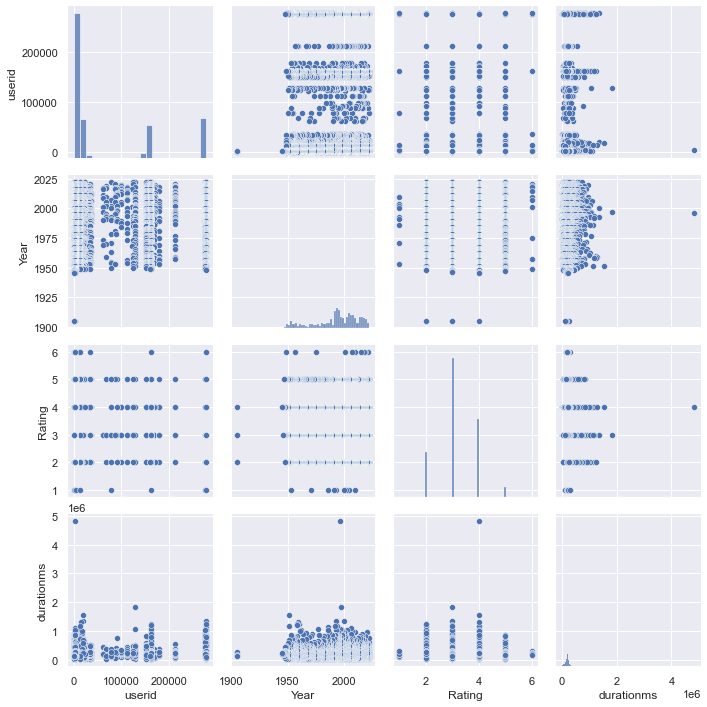

In [28]:
import seaborn as sns
sns.pairplot(data)

In [29]:
#Correlation
data2=data.corr()
data2

,userid,Year,Rating,durationms
userid,1.000000,0.059080,0.000323,0.021341
Year,0.059080,1.000000,-0.012497,0.020195
Rating,0.000323,-0.012497,1.000000,0.001331
durationms,0.021341,0.020195,0.001331,1.000000


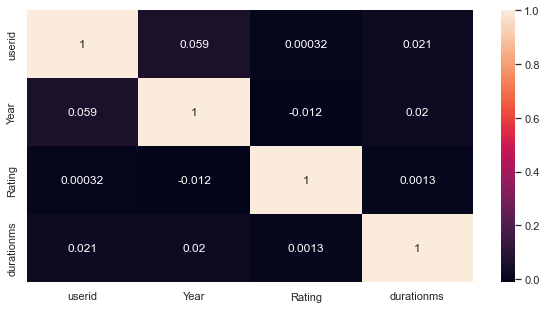

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(data2,annot=True)
plt.show()

In [31]:
import pickle

In [32]:
data.to_dict()

{'userid': {0: 643,
  1: 882,
  2: 753,
  3: 1105,
  4: 1140,
  5: 2784,
  7: 2110,
  8: 1065,
  9: 1135,
  10: 1114,
  11: 254,
  12: 3146,
  13: 2844,
  14: 161936,
  15: 321,
  16: 3471,
  17: 3251,
  18: 3251,
  19: 3251,
  20: 3167,
  21: 161971,
  22: 161480,
  23: 161265,
  24: 21356,
  25: 19841,
  26: 13828,
  27: 13828,
  28: 13827,
  29: 13525,
  30: 13498,
  31: 13246,
  32: 13246,
  33: 13246,
  34: 12411,
  35: 4157,
  36: 276861,
  37: 277427,
  38: 276928,
  39: 3757,
  40: 156311,
  41: 156311,
  42: 1095,
  43: 1050,
  44: 929,
  45: 651,
  46: 643,
  47: 392,
  48: 392,
  49: 2365,
  50: 2341,
  51: 12205,
  52: 162052,
  53: 424,
  54: 70,
  55: 625,
  56: 1070,
  57: 321,
  58: 408,
  59: 566,
  60: 392,
  61: 643,
  62: 183,
  63: 151234,
  64: 128903,
  65: 4309,
  66: 2365,
  67: 161259,
  68: 161041,
  69: 4157,
  70: 2276,
  71: 2033,
  72: 1130,
  73: 12202,
  74: 1260,
  75: 1070,
  76: 278543,
  77: 2276,
  78: 1070,
  79: 1070,
  80: 23516,
  81: 1100,
  8

In [33]:
pickle.dump(data.to_dict(),open('Music_dict.pkl','wb'))

In [34]:
data['Singer'].values

array(['K. J. Yesudas, Hariharan',
       'Roop Kumar Rathod, Sukhwinder Singh, Hariharan, Udit Narayan, Sonu Nigam',
       'S. P. Balasubrahmanyam, Hariharan, K. S. Chithra', ...,
       'Sukhwinder Singh', 'Suresh Wadkar',
       'Suresh Wadkar, Purushottam Berde'], dtype=object)

In [35]:
data['moviealbum']=data['moviealbum'].apply(lambda x:x.split())

C:\Users\Admin\AppData\Local\Temp/ipykernel_4348/2305311781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moviealbum']=data['moviealbum'].apply(lambda x:x.split())


In [36]:
data.head()

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan","[Millenium, Stars]",2012,Various Artists,Hindi,3.0,140693,2010s
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...","[L.O.C., Kargil]",2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra","[Kabhi, Na, Kabhi, Original, Motion, Picture, ...",1998,A.R. Rahman,Hindi,4.0,57493,1990s
3,1105,College Style,"KK, Hariharan","[Prema, Desam]",1996,A.R. Rahman,Hindi,3.0,202235,1990s
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan","[Khamoshi-, The, Musical]",1996,Various Artists,Hindi,3.0,502067,1990s


In [37]:
data['Singer'].apply(lambda x:[i.replace(" ","") for i in x])

0        [K, ., , J, ., , Y, e, s, u, d, a, s, ,, , H, ...
1        [R, o, o, p, , K, u, m, a, r, , R, a, t, h, o,...
2        [S, ., , P, ., , B, a, l, a, s, u, b, r, a, h,...
3                   [K, K, ,, , H, a, r, i, h, a, r, a, n]
4        [A, l, k, a, , Y, a, g, n, i, k, ,, , H, a, r,...
                               ...                        
15806            [P, r, a, h, l, a, d, , S, h, i, n, d, e]
15807    [S, h, u, b, h, a, n, g, i, , K, e, d, a, r, ,...
15808      [S, u, k, h, w, i, n, d, e, r, , S, i, n, g, h]
15809               [S, u, r, e, s, h, , W, a, d, k, a, r]
15810    [S, u, r, e, s, h, , W, a, d, k, a, r, ,, , P,...
Name: Singer, Length: 15747, dtype: object

In [38]:
data.head()

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan","[Millenium, Stars]",2012,Various Artists,Hindi,3.0,140693,2010s
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...","[L.O.C., Kargil]",2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra","[Kabhi, Na, Kabhi, Original, Motion, Picture, ...",1998,A.R. Rahman,Hindi,4.0,57493,1990s
3,1105,College Style,"KK, Hariharan","[Prema, Desam]",1996,A.R. Rahman,Hindi,3.0,202235,1990s
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan","[Khamoshi-, The, Musical]",1996,Various Artists,Hindi,3.0,502067,1990s


In [39]:
data['tags']=data['Singer']+['moviealbum']+['Music_Director']+['Year']

C:\Users\Admin\AppData\Local\Temp/ipykernel_4348/1061796973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags']=data['Singer']+['moviealbum']+['Music_Director']+['Year']


In [40]:
data.head()

,userid,Song_title,Singer,moviealbum,Year,Music_Director,Language,Rating,durationms,decade,tags
0,643,Oh Mumbai,"K. J. Yesudas, Hariharan","[Millenium, Stars]",2012,Various Artists,Hindi,3.0,140693,2010s,"K. J. Yesudas, HariharanmoviealbumMusic_Direct..."
1,882,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan...","[L.O.C., Kargil]",2003,"Anu Malik, Javed Akhtar",Hindi,2.0,211493,2000s,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan..."
2,753,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chithra","[Kabhi, Na, Kabhi, Original, Motion, Picture, ...",1998,A.R. Rahman,Hindi,4.0,57493,1990s,"S. P. Balasubrahmanyam, Hariharan, K. S. Chith..."
3,1105,College Style,"KK, Hariharan","[Prema, Desam]",1996,A.R. Rahman,Hindi,3.0,202235,1990s,"KK, HariharanmoviealbumMusic_DirectorYear"
4,1140,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, Hariharan","[Khamoshi-, The, Musical]",1996,Various Artists,Hindi,3.0,502067,1990s,"Alka Yagnik, HariharanmoviealbumMusic_Director..."


In [41]:
data['tags'].head()

0    K. J. Yesudas, HariharanmoviealbumMusic_Direct...
1    Roop Kumar Rathod, Sukhwinder Singh, Hariharan...
2    S. P. Balasubrahmanyam, Hariharan, K. S. Chith...
3            KK, HariharanmoviealbumMusic_DirectorYear
4    Alka Yagnik, HariharanmoviealbumMusic_Director...
Name: tags, dtype: object

In [42]:
new_data=data[['Song_title','tags']]

In [43]:
new_data['tags']==new_data['tags'].apply(lambda x:" ".join(x))

0        False
1        False
2        False
3        False
4        False
         ...  
15806    False
15807    False
15808    False
15809    False
15810    False
Name: tags, Length: 15747, dtype: bool

In [44]:
new_data.head()

,Song_title,tags
0,Oh Mumbai,"K. J. Yesudas, HariharanmoviealbumMusic_Direct..."
1,Main Kahin Bhi Rahoon,"Roop Kumar Rathod, Sukhwinder Singh, Hariharan..."
2,Mere Yaara Dildara,"S. P. Balasubrahmanyam, Hariharan, K. S. Chith..."
3,College Style,"KK, HariharanmoviealbumMusic_DirectorYear"
4,Bahon Ke Darmiyan - Khamoshi - The Musical / S...,"Alka Yagnik, HariharanmoviealbumMusic_Director..."


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
pip install nltk

In [47]:
new_data['tags'][11]

'Ajay-Atul, Shreya GhoshalmoviealbumMusic_DirectorYear'

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def stem(text):
    y = []
        
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [50]:
new_data['tags'] = new_data['tags'].apply(stem)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4348/1214595124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(stem)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500,stop_words='english')

In [52]:
vectors=cv.fit_transform(new_data['tags']).toarray()

In [53]:
vectors

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
cv.get_feature_names()

['aamir',
 'aarya',
 'aasha',
 'abhijeet',
 'abhijit',
 'abhishekimoviealbummusic_directoryear',
 'adarsh',
 'aditi',
 'ajay',
 'ajaymoviealbummusic_directoryear',
 'akriti',
 'ali',
 'alimoviealbummusic_directoryear',
 'alka',
 'alvares',
 'ambekarmoviealbummusic_directoryear',
 'amit',
 'amitabh',
 'amitrajmoviealbummusic_directoryear',
 'anand',
 'anandi',
 'anjjanmoviealbummusic_directoryear',
 'ankit',
 'annett',
 'anupama',
 'anuradha',
 'anuradhamoviealbummusic_directoryear',
 'aparna',
 'arijit',
 'arjit',
 'arman',
 'arora',
 'arun',
 'ase',
 'asha',
 'ashok',
 'aslammoviealbummusic_directoryear',
 'atif',
 'atul',
 'atulmoviealbummusic_directoryear',
 'avadhoot',
 'azizmoviealbummusic_directoryear',
 'bablu',
 'badshahmoviealbummusic_directoryear',
 'bajimoviealbummusic_directoryear',
 'balasubrahmanyam',
 'bandodkarmoviealbummusic_directoryear',
 'barmanmoviealbummusic_directoryear',
 'bela',
 'benni',
 'bhanushalimoviealbummusic_directoryear',
 'bhardwaj',
 'bhattacharyamov

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
similarity=cosine_similarity(vectors)

In [57]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:11]

[(360, 0.7071067811865475),
 (560, 0.7071067811865475),
 (561, 0.7071067811865475),
 (1439, 0.7071067811865475),
 (2032, 0.7071067811865475),
 (2320, 0.7071067811865475),
 (2321, 0.7071067811865475),
 (3419, 0.7071067811865475),
 (4160, 0.7071067811865475),
 (4161, 0.7071067811865475)]

In [59]:
def recommend(Song_title):
    index = new_data[new_data['Song_title'] == Song_title].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_data.iloc[i[0]].Song_title)
        print(data.iloc[i[0]].Singer)
        print(data.iloc[i[0]].Music_Director)
        print(data.iloc[i[0]].moviealbum)
        print(data.iloc[i[0]].Year)

In [60]:
recommend('Barsha Rani Ra Gelhi Jhia')

Tum Jo Mere Pass Ho
Abhijit Bhattacharya
Siddhant Madhav
['Super', 'Dhamaal.Com']
2022
Husnn Hai Suhaana New
Abhijit Bhattacharya
Raja Nag
['Smritir', 'Collage', 'E', 'Pop', 'Album']
2021
Ki Je Holo Ta Janina
Abhijit Bhattacharya
Japani Bhai
['Jayveer', 'Odia', 'Film']
2021
Maago Tomar Agomone
Abhijit Bhattacharya
Chinmay Dash & Bibhun
['Barsha', 'Rani', 'Ra', 'Gelhi', 'Jhia', 'Odia', 'Song']
2021
To Premare Padigali Ki
Abhijit Bhattacharya
Jeet Gannguli
['Sree', 'Bhumi', 'Puja', 'Theme', 'Song-2021']
2021


In [61]:
pickle.dump(new_data.to_dict(),open('music_dict.pkl','wb'))

In [62]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [63]:
pickle.dump(data.to_dict(),open('all_music_dict.pkl','wb'))